In [2]:
import numpy as np 
import pandas as pd
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
#download mnist data and split into train and test sets
(x_train,y_train),(x_test,y_test)= mnist.load_data()

### (0-9) digits (images) as gray scale

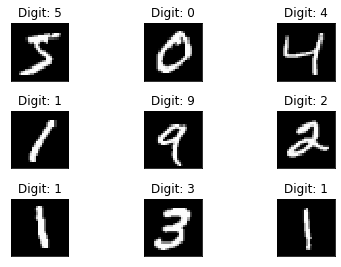

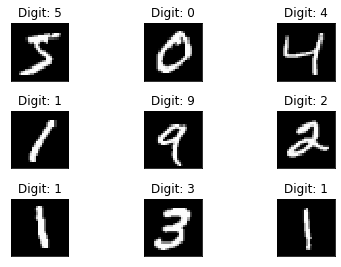

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

### plot 4 images as gray scale

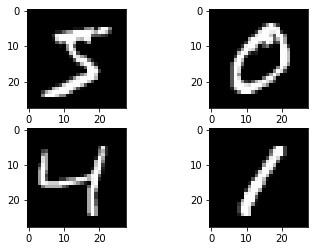

In [5]:
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [17]:
# print the train and test dataset shapes
print("shape of x_train: ",(x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
print("shape of y_train: ",(y_train.shape[0]))
print("shape of x_test: ",(x_test.shape[0],x_test.shape[1],x_test.shape[2],1))
print("shape of y_test: ",(y_test.shape[0])) 

shape of x_train:  (60000, 28, 28, 1)
shape of y_train:  60000
shape of x_test:  (10000, 28, 28, 1)
shape of y_test:  10000


In [7]:
# Reshaping to format (batch, height, width, channels)
# flatten 28*28 images to a 784 vector for each 


x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1).astype('float32')
x_train.shape,x_train.shape



# # (samples,pixels(heigth and weigth))'
# x_train =x_train.resahpe(x_train.shape[0],x_train.shape[1],x_train.shape[2]).astype('float32')
# # x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
# x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')
# x_train.shape,x_test.shape


((60000, 28, 28, 1), (60000, 28, 28, 1))

In [8]:
# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

In [9]:
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


### One Hot Encode

In [10]:
num_of_classes = 10
y_train = np_utils.to_categorical(y_train, num_of_classes)
y_test = np_utils.to_categorical(y_test, num_of_classes)
print("Y_train shape:",y_train.shape)
print("Y_test_shape:",y_test.shape)

Y_train shape: (60000, 10)
Y_test_shape: (10000, 10)


### Create Model

In [11]:
model = Sequential()
# here 32 is filter/output channel and in input shape parameter is heigth ,width,channel
model.add(Conv2D(32, (5, 5), input_shape=(x_train.shape[1], x_train.shape[2],1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_of_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


#### compile model

In [12]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### fitting model

In [13]:
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 27s 450us/step - loss: 0.3902 - acc: 0.8790 - val_loss: 0.0823 - val_acc: 0.9732
Epoch 2/10
60000/60000 [==============================] - 27s 454us/step - loss: 0.0953 - acc: 0.9712 - val_loss: 0.0508 - val_acc: 0.9836
Epoch 3/10
60000/60000 [==============================] - 24s 399us/step - loss: 0.0700 - acc: 0.9785 - val_loss: 0.0360 - val_acc: 0.9879
Epoch 4/10
60000/60000 [==============================] - 23s 388us/step - loss: 0.0563 - acc: 0.9826 - val_loss: 0.0324 - val_acc: 0.9904
Epoch 5/10
60000/60000 [==============================] - 25s 416us/step - loss: 0.0469 - acc: 0.9858 - val_loss: 0.0281 - val_acc: 0.9908
Epoch 6/10
60000/60000 [==============================] - 23s 387us/step - loss: 0.0436 - acc: 0.9864 - val_loss: 0.0339 - val_acc: 0.9889
Epoch 7/10
60000/60000 [==============================] - 23s 388us/

In [14]:
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss:",scores[0])
print("Test Accuracy:",scores[1])

Test Loss: 0.023665156782674602
Test Accuracy: 0.9932


In [15]:
model.save('MNISt_DATA_MODEL.h5')

In [16]:
#model to predict
results = model.predict(x_test)
results

array([[7.3676056e-09, 1.9966824e-07, 5.7315237e-06, ..., 9.9998128e-01,
        4.7024621e-08, 2.0774105e-06],
       [2.8693094e-07, 5.7248162e-06, 9.9999392e-01, ..., 1.3116130e-10,
        4.9777443e-10, 4.2558250e-13],
       [3.0353232e-07, 9.9988222e-01, 4.1915173e-06, ..., 3.6480895e-05,
        1.4507057e-05, 3.7277977e-07],
       ...,
       [7.8569503e-12, 4.7244431e-10, 3.7536804e-10, ..., 1.9585942e-08,
        2.6398919e-07, 2.8472942e-07],
       [1.0731161e-06, 1.8817028e-09, 2.0424669e-10, ..., 8.2860572e-09,
        2.5229357e-04, 4.6395851e-07],
       [8.3179557e-08, 1.6377244e-08, 1.5432236e-07, ..., 1.3919282e-10,
        4.8233186e-08, 1.7993353e-10]], dtype=float32)

In [ ]:
# img = Image.open('data/mnist_data/validation/1/1_2.png').convert("L")
# img = np.resize(img, (28,28,1))
# im2arr = np.array(img)
# im2arr = im2arr.reshape(1,28,28,1)

In [ ]:

# y_pred = model.predict_classes(im2arr)
# print(y_pred)